# School Budgeting with Machine Learning in Python
> A Summary of lecture "Case Study- School Budgeting with Machine Learning in Python", via datacamp

- toc: true 
- badges: true
- comments: true
- author: Chanseok Kang
- categories: [Python, Datacamp, Machine Learning]
- image: 

In [84]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv('train.csv', index_col=0)

## Introducing the challenge
- Budgets for schools are huge, complex, and not standardize.
    - Hundreds of hours each year are spent manually labelling
- Goal: Build a machine learning algorithm that can automate the process
- Supervised Learning problem


> Note: Due to the size of dataset, it is not included in this repository, however, you can download it through [kaggle repo](https://www.kaggle.com/jeromeblanchet/drivendatas-boxplots-for-education-dataset)

### Loading the data
Now it's time to check out the dataset! You'll use pandas (which has been pre-imported as pd) to load your data into a DataFrame and then do some Exploratory Data Analysis (EDA) of it.

Some of the column names correspond to **features** - descriptions of the budget items - such as the ```Job_Title_Description``` column. The values in this column tell us if a budget item is for a teacher, custodian, or other employee.

Some columns correspond to the budget item **labels** you will be trying to predict with your model. For example, the ```Object_Type``` column describes whether the budget item is related classroom supplies, salary, travel expenses, etc.

In [85]:
df = pd.read_csv('train.csv', index_col=0)


In [86]:
df.head(5)

,Function,Use,Sharing,Reporting,Student_Type,Position_Type,Object_Type,Pre_K,Operating_Status,Object_Description,...,Sub_Object_Description,Location_Description,FTE,Function_Description,Facility_or_Department,Position_Extra,Total,Program_Description,Fund_Description,Text_1
134338,Teacher Compensation,Instruction,School Reported,School,NO_LABEL,Teacher,NO_LABEL,NO_LABEL,PreK-12 Operating,NaN,...,NaN,NaN,1.0,NaN,NaN,KINDERGARTEN,50471.810,KINDERGARTEN,General Fund,NaN
206341,NO_LABEL,NO_LABEL,NO_LABEL,NO_LABEL,NO_LABEL,NO_LABEL,NO_LABEL,NO_LABEL,Non-Operating,CONTRACTOR SERVICES,...,NaN,NaN,NaN,RGN GOB,NaN,UNDESIGNATED,3477.860,BUILDING IMPROVEMENT SERVICES,NaN,BUILDING IMPROVEMENT SERVICES
326408,Teacher Compensation,Instruction,School Reported,School,Unspecified,Teacher,Base Salary/Compensation,Non PreK,PreK-12 Operating,Personal Services - Teachers,...,NaN,NaN,1.0,NaN,NaN,TEACHER,62237.130,Instruction - Regular,General Purpose School,NaN
364634,Substitute Compensation,Instruction,School Reported,School,Unspecified,Substitute,Benefits,NO_LABEL,PreK-12 Operating,EMPLOYEE BENEFITS,...,NaN,NaN,NaN,UNALLOC BUDGETS/SCHOOLS,NaN,PROFESSIONAL-INSTRUCTIONAL,22.300,GENERAL MIDDLE/JUNIOR HIGH SCH,NaN,REGULAR INSTRUCTION
47683,Substitute Compensation,Instruction,School Reported,School,Unspecified,Teacher,Substitute Compensation,NO_LABEL,PreK-12 Operating,TEACHER COVERAGE FOR TEACHER,...,NaN,NaN,NaN,NON-PROJECT,NaN,PROFESSIONAL-INSTRUCTIONAL,54.166,GENERAL HIGH SCHOOL EDUCATION,NaN,REGULAR INSTRUCTION


In [87]:
df.tail()

,Function,Use,Sharing,Reporting,Student_Type,Position_Type,Object_Type,Pre_K,Operating_Status,Object_Description,...,Sub_Object_Description,Location_Description,FTE,Function_Description,Facility_or_Department,Position_Extra,Total,Program_Description,Fund_Description,Text_1
109283,Professional Development,ISPD,Shared Services,Non-School,Unspecified,Instructional Coach,Other Compensation/Stipend,NO_LABEL,PreK-12 Operating,WORKSHOP PARTICIPANT,...,NaN,STAFF DEV AND INSTR MEDIA,NaN,INST STAFF TRAINING SVCS,NaN,NaN,48.620000,NaN,GENERAL FUND,STAFF DEV AND INSTR MEDIA
102430,Substitute Compensation,Instruction,School Reported,School,Unspecified,Substitute,Base Salary/Compensation,NO_LABEL,PreK-12 Operating,SALARIES OF PART TIME EMPLOYEE,...,NaN,NaN,0.00431,"TITLE II,D",NaN,PROFESSIONAL-INSTRUCTIONAL,128.824985,INSTRUCTIONAL STAFF TRAINING,NaN,INSTRUCTIONAL STAFF
413949,Parent & Community Relations,NO_LABEL,School Reported,School,NO_LABEL,Other,NO_LABEL,NO_LABEL,PreK-12 Operating,NaN,...,NaN,NaN,1.00000,NaN,NaN,PARENT/TITLE I,4902.290000,Misc,Schoolwide Schools,NaN
433672,Library & Media,Instruction,School on Central Budgets,Non-School,Unspecified,Librarian,Benefits,NO_LABEL,PreK-12 Operating,EMPLOYEE BENEFITS,...,NaN,ED RESOURCE SERVICES,NaN,NON-PROJECT,NaN,OFFICE/ADMINISTRATIVE SUPPORT,4020.290000,MEDIA SUPPORT SERVICES,NaN,INSTRUCTIONAL STAFF
415831,Substitute Compensation,Instruction,School Reported,School,Poverty,Substitute,Substitute Compensation,Non PreK,PreK-12 Operating,Salaries And Wages For Substitute Professionals,...,Inservice Substitute Teachers Grant Funded,School,NaN,Instruction,Instruction And Curriculum,CERTIFIED SUBSTITUTE,46.530000,Accelerated Education,"""Title Part A Improving Basic Programs""",MISCELLANEOUS


In [88]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 400277 entries, 134338 to 415831
Data columns (total 25 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   Function                400277 non-null  object 
 1   Use                     400277 non-null  object 
 2   Sharing                 400277 non-null  object 
 3   Reporting               400277 non-null  object 
 4   Student_Type            400277 non-null  object 
 5   Position_Type           400277 non-null  object 
 6   Object_Type             400277 non-null  object 
 7   Pre_K                   400277 non-null  object 
 8   Operating_Status        400277 non-null  object 
 9   Object_Description      375493 non-null  object 
 10  Text_2                  88217 non-null   object 
 11  SubFund_Description     306855 non-null  object 
 12  Job_Title_Description   292743 non-null  object 
 13  Text_3                  109152 non-null  object 
 14  Text_4         

### Summarizing the data
You'll continue your EDA in this exercise by computing summary statistics for the numeric data in the dataset.

You can use df.info() in the IPython Shell to determine which columns of the data are numeric, specifically type float64. You'll notice that there are two numeric columns, called FTE and Total.

- FTE: Stands for "full-time equivalent". If the budget item is associated to an employee, this number tells us the percentage of full-time that the employee works. A value of 1 means the associated employee works for the school full-time. A value close to 0 means the item is associated to a part-time or contracted employee.
- Total: Stands for the total cost of the expenditure. This number tells us how much the budget item cost.

In [89]:
# Print the summary statistics
df.describe()

,FTE,Total
count,126071.000000,3.957220e+05
mean,0.426794,1.310586e+04
std,0.573576,3.682254e+05
min,-0.087551,-8.746631e+07
25%,0.000792,7.379770e+01
50%,0.130927,4.612300e+02
75%,1.000000,3.652662e+03
max,46.800000,1.297000e+08


In [90]:
df['FTE'].describe()

count    126071.000000
mean          0.426794
std           0.573576
min          -0.087551
25%           0.000792
50%           0.130927
75%           1.000000
max          46.800000
Name: FTE, dtype: float64

Text(0, 0.5, 'num employee')

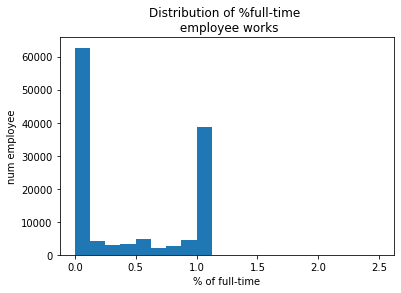

In [91]:
# Create the histogram
plt.hist(df['FTE'].dropna(), bins=20,range=[0, 2.5])

# Add title and labels
plt.title('Distribution of %full-time \n employee works')
plt.xlabel('% of full-time')
plt.ylabel('num employee')

{'whiskers': [<matplotlib.lines.Line2D at 0x1bd92fcebb0>,
 'caps': [<matplotlib.lines.Line2D at 0x1bd92fdd130>,
 'boxes': [<matplotlib.lines.Line2D at 0x1bd92fce760>],
 'medians': [<matplotlib.lines.Line2D at 0x1bd92fdd850>],
 'fliers': [<matplotlib.lines.Line2D at 0x1bd92fddbe0>],
 'means': []}

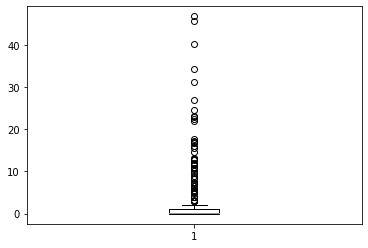

In [92]:
plt.boxplot(df['FTE'].dropna())

## Looking at the datatypes
- ML algorithms work on numbers, not strings
    - Need a numeric representation of these strings
- Strings can be slow compared to numbers
- In pandas, ```category``` dtype encodes categorical data numerically,
    - Can speed up code
    

### Exploring datatypes in pandas
It's always good to know what datatypes you're working with, especially when the inefficient pandas type object may be involved. Towards that end, let's explore what we have.

In [93]:
df.dtypes

Function                   object
Use                        object
Sharing                    object
Reporting                  object
Student_Type               object
Position_Type              object
Object_Type                object
Pre_K                      object
Operating_Status           object
Object_Description         object
Text_2                     object
SubFund_Description        object
Job_Title_Description      object
Text_3                     object
Text_4                     object
Sub_Object_Description     object
Location_Description       object
FTE                       float64
Function_Description       object
Facility_or_Department     object
Position_Extra             object
Total                     float64
Program_Description        object
Fund_Description           object
Text_1                     object
dtype: object

### Encode the labels as categorical variables
Remember, your ultimate goal is to predict the probability that a certain label is attached to a budget line item. You just saw that many columns in your data are the inefficient object type. Does this include the labels you're trying to predict? Let's find out!

There are 9 columns of labels in the dataset. Each of these columns is a category that has many possible values it can take. 

You will notice that every label is encoded as an object datatype. Because category datatypes are much more efficient your task is to convert the labels to category types using the ```.astype()``` method.

In [94]:
LABELS = ['Function', 'Use', 'Sharing', 'Reporting', 'Student_Type', 'Position_Type',
          'Object_Type', 'Pre_K', 'Operating_Status']

In [95]:
# Define the lambda function: categorize_label
categorize_label = lambda x: x.astype('category')

# Convert df[LABELS] to a category type
df[LABELS] = categorize_label(df[LABELS])

# Print the converted dtypes
print(df[LABELS].dtypes)

Function            category
Use                 category
Sharing             category
Reporting           category
Student_Type        category
Position_Type       category
Object_Type         category
Pre_K               category
Operating_Status    category
dtype: object


### Counting unique labels
As Peter mentioned in the video, there are over 100 unique labels. In this exercise, you will explore this fact by counting and plotting the number of unique values for each category of label.

Text(0, 0.5, 'Number of unique values')

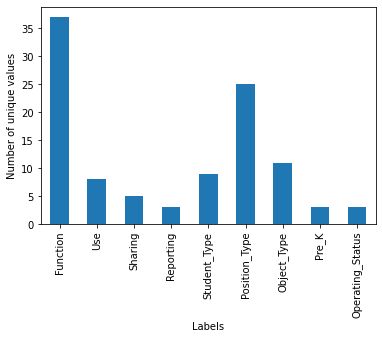

In [96]:
nunique_labels=df[LABELS].nunique()
#pd.Series.nunique(df[LABELS])
# Plot number of unique values for each label
nunique_labels.plot(kind='bar')

# Label the axes
plt.xlabel('Labels')
plt.ylabel('Number of unique values')

In [97]:
df['Use'].value_counts()

Instruction                    203608
NO_LABEL                        78712
O&M                             45868
ISPD                            26118
Pupil Services & Enrichment     23779
Leadership                      15715
Business Services                6120
Untracked Budget Set-Aside        357
Name: Use, dtype: int64

Text(0, 0.5, 'Number of unique values')

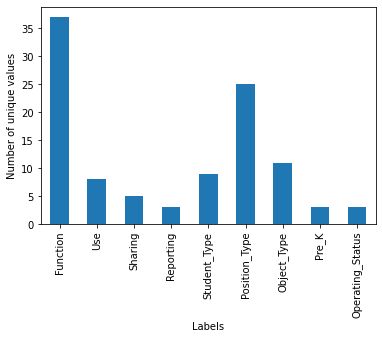

In [98]:
# Calculate number of unique values for each labels: num_unique_labels
num_unique_labels = df[LABELS].apply(pd.Series.nunique)

# Plot number of unique values for each label
num_unique_labels.plot(kind='bar')

# Label the axes
plt.xlabel('Labels')
plt.ylabel('Number of unique values')

## How do we measure success?
- Accuracy can be misleading when classes are imbalanced
    - Legitmate email: 99%, Spam: 1%
    - Model that never predicts spam will be 99% accurate!
- Metric used in this problem: log loss
    - Loss function
    - Measure of error
    - Want to minimize the error (unlike accuracy)
- Log loss binary classification
$$ log loss = -\frac{1}{N} \sum^{N}_{i=1}(y_i \log(p_i)) + (1- y_i)\log(1-p_i)) $$
    - Actual value: $y: {1=\text{yes}, 0=\text{no}}$
    - Prediction (probability that the value is 1): $p$
    

### Computing log loss with NumPy
To see how the log loss metric handles the trade-off between accuracy and confidence, we will use some sample data generated with NumPy and compute the log loss using the provided function ```compute_log_loss()```, which Peter showed you in the video.
```python
def compute_log_loss(predicted, actual, eps=1e-14):
    """Compute the logarithmic loss between predicted and
       actual when these are 1D arrays
       
       :param predicted: The predicted probabilties as floats between 0-1
       :param actual: The actual binary labels. Either 0 or 1
       :param eps (optional): log(0) is inf, so we need to offset our
                               predicted values slightly by eps from 0 or 1.
    """
    predicted = np.clip(predicted, eps, 1-eps)
    loss = -1 * np.mean(actual * np.log(predicted) + (1 - actual) * np.log(1 - predicted))
    return loss
```

In [99]:
def compute_log_loss(predicted, actual, eps=1e-14):
    """Compute the logarithmic loss between predicted and
       actual when these are 1D arrays

       :param predicted: The predicted probabilties as floats between 0-1
       :param actual: The actual binary labels. Either 0 or 1
       :param eps (optional): log(0) is inf, so we need to offset our
                               predicted values slightly by eps from 0 or 1.
    """
    predicted = np.clip(predicted, eps, 1-eps)
    loss = -1 * np.mean(actual * np.log(predicted) + (1 - actual) * np.log(1 - predicted))
    return loss

In [100]:
correct_confident = np.array([0.95, 0.95, 0.95, 0.95, 0.95, 0.05, 0.05, 0.05, 0.05, 0.05])
correct_not_confident = np.array([0.65, 0.65, 0.65, 0.65, 0.65, 0.35, 0.35, 0.35, 0.35, 0.35])
wrong_not_confident = np.array([0.35, 0.35, 0.35, 0.35, 0.35, 0.65, 0.65, 0.65, 0.65, 0.65])
wrong_confident = np.array([0.05, 0.05, 0.05, 0.05, 0.05, 0.95, 0.95, 0.95, 0.95, 0.95])
actual_labels = np.array([1., 1., 1., 1., 1., 0., 0., 0., 0., 0.])

In [101]:
# Compute and print log loss for 1st case
correct_confident_loss = compute_log_loss(correct_confident, actual_labels)
print("Log loss, correct and confident: {}".format(correct_confident_loss)) 

# Compute log loss for 2nd case
correct_not_confident_loss = compute_log_loss(correct_not_confident, actual_labels)
print("Log loss, correct and not confident: {}".format(correct_not_confident_loss)) 

# Compute and print log loss for 3rd case
wrong_not_confident_loss = compute_log_loss(wrong_not_confident, actual_labels)
print("Log loss, wrong and not confident: {}".format(wrong_not_confident_loss)) 

# Compute and print log loss for 4th case
wrong_confident_loss = compute_log_loss(wrong_confident, actual_labels)
print("Log loss, wrong and confident: {}".format(wrong_confident_loss)) 

# Compute and print log loss for actual labels
actual_labels_loss = compute_log_loss(actual_labels, actual_labels)
print("Log loss, actual labels: {}".format(actual_labels_loss)) 


Log loss, correct and confident: 0.05129329438755058
Log loss, correct and not confident: 0.4307829160924542
Log loss, wrong and not confident: 1.049822124498678
Log loss, wrong and confident: 2.9957322735539904
Log loss, actual labels: 9.99200722162646e-15


## Time to build model
- Always a good approach to start with a very simple model
- Gives a sense of how challengeing the problem is
- Many more things can go wrong in complex models
- How much signal can we pull out using basic methods?
- Train basic model on numeric data only
    - Want to go from raw data to predictions quickly
- Multiclass logistic regression
    - Train classifier on each label separately and use those to predict
- Format predictions and save to csv
- Compute log loss score
- Splitting the multi-class dataset
    - Recall: Train-test split
        - Will not work here
        - May end up with labels in test set that never appear in training set
    -  Solution: ```StratifiedShyffleSplit```
        - Only works with a single target variable

### Setting up a train-test split in scikit-learn
Alright, you've been patient and awesome. It's finally time to start training models!

The first step is to split the data into a training set and a test set. Some labels don't occur very often, but we want to make sure that they appear in both the training and the test sets. We provide a function that will make sure at least ```min_count``` examples of each label appear in each split: ```multilabel_train_test_split```.

### Setting up a train-test split in scikit-learn
Alright, you've been patient and awesome. It's finally time to start training models!

The first step is to split the data into a training set and a test set. Some labels don't occur very often, but we want to make sure that they appear in both the training and the test sets. We provide a function that will make sure at least ```min_count``` examples of each label appear in each split: ```multilabel_train_test_split```.

In [102]:
from warnings import warn

import numpy as np
import pandas as pd

def multilabel_sample(y, size=1000, min_count=5, seed=None):
    """ Takes a matrix of binary labels `y` and returns
        the indices for a sample of size `size` if
        `size` > 1 or `size` * len(y) if size =< 1.
        The sample is guaranteed to have > `min_count` of
        each label.
    """
    try:
        if (np.unique(y).astype(int) != np.array([0, 1])).any():
            raise ValueError()
    except (TypeError, ValueError):
        raise ValueError('multilabel_sample only works with binary indicator matrices')

    if (y.sum(axis=0) < min_count).any():
        raise ValueError('Some classes do not have enough examples. Change min_count if necessary.')

    if size <= 1:
        size = np.floor(y.shape[0] * size)

    if y.shape[1] * min_count > size:
        msg = "Size less than number of columns * min_count, returning {} items instead of {}."
        warn(msg.format(y.shape[1] * min_count, size))
        size = y.shape[1] * min_count

    rng = np.random.RandomState(seed if seed is not None else np.random.randint(1))

    if isinstance(y, pd.DataFrame):
        choices = y.index
        y = y.values
    else:
        choices = np.arange(y.shape[0])

    sample_idxs = np.array([], dtype=choices.dtype)

    # first, guarantee > min_count of each label
    for j in range(y.shape[1]):
        label_choices = choices[y[:, j] == 1]
        label_idxs_sampled = rng.choice(label_choices, size=min_count, replace=False)
        sample_idxs = np.concatenate([label_idxs_sampled, sample_idxs])

    sample_idxs = np.unique(sample_idxs)

    # now that we have at least min_count of each, we can just random sample
    sample_count = int(size - sample_idxs.shape[0])

    # get sample_count indices from remaining choices
    remaining_choices = np.setdiff1d(choices, sample_idxs)
    remaining_sampled = rng.choice(remaining_choices,
                                   size=sample_count,
                                   replace=False)

    return np.concatenate([sample_idxs, remaining_sampled])


def multilabel_sample_dataframe(df, labels, size, min_count=5, seed=None):
    """ Takes a dataframe `df` and returns a sample of size `size` where all
        classes in the binary matrix `labels` are represented at
        least `min_count` times.
    """
    idxs = multilabel_sample(labels, size=size, min_count=min_count, seed=seed)
    return df.loc[idxs]


def multilabel_train_test_split(X, Y, size, min_count=5, seed=None):
    """ Takes a features matrix `X` and a label matrix `Y` and
        returns (X_train, X_test, Y_train, Y_test) where all
        classes in Y are represented at least `min_count` times.
    """
    index = Y.index if isinstance(Y, pd.DataFrame) else np.arange(Y.shape[0])

    test_set_idxs = multilabel_sample(Y, size=size, min_count=min_count, seed=seed)
    train_set_idxs = np.setdiff1d(index, test_set_idxs)

    test_set_mask = index.isin(test_set_idxs)
    train_set_mask = ~test_set_mask

    return (X[train_set_mask], X[test_set_mask], Y[train_set_mask], Y[test_set_mask])

You'll start with a simple model that uses just the numeric columns of your DataFrame when calling ```multilabel_train_test_split```. 

In [103]:
NUMERIC_COLUMNS = ['FTE', 'Total']

In [104]:
category_data_only = df.drop(LABELS, axis=1)

In [105]:
category_data_only.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 400277 entries, 134338 to 415831
Data columns (total 16 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   Object_Description      375493 non-null  object 
 1   Text_2                  88217 non-null   object 
 2   SubFund_Description     306855 non-null  object 
 3   Job_Title_Description   292743 non-null  object 
 4   Text_3                  109152 non-null  object 
 5   Text_4                  53746 non-null   object 
 6   Sub_Object_Description  91603 non-null   object 
 7   Location_Description    162054 non-null  object 
 8   FTE                     126071 non-null  float64
 9   Function_Description    342195 non-null  object 
 10  Facility_or_Department  53886 non-null   object 
 11  Position_Extra          264764 non-null  object 
 12  Total                   395722 non-null  float64
 13  Program_Description     304660 non-null  object 
 14  Fund_Descriptio

In [106]:
# Create the new DataFrame: numeric_data_only
numeric_data_only = df[NUMERIC_COLUMNS].fillna(-1000).copy()
category_data_only = df.drop(NUMERIC_COLUMNS, axis=1).fillna(-1000).copy()
# Get labels and convert to dummy variables: label_dummies
label_dummies = pd.get_dummies(df[LABELS])

# Create training and test sets
X_train, X_test, y_train, y_test = multilabel_train_test_split(numeric_data_only, label_dummies,
                                                               size=0.2, seed=123)

# Print the info
print("X_train info:")
print(X_train.info())
print("\nX_test info:")
print(X_test.info())
print("\ny_train info:")
print(y_train.info())
print("\ny_test info:")
print(y_test.info())

ValueError: Cannot setitem on a Categorical with a new category, set the categories first

### Training a model
With split data in hand, you're only a few lines away from training a model.

In this exercise, you will import the logistic regression and one versus rest classifiers in order to fit a multi-class logistic regression model to the ```NUMERIC_COLUMNS``` of your feature data.

Then you'll test and print the accuracy with the ```.score()``` method to see the results of training.

**Before you train!** Remember, we're ultimately going to be using logloss to score our model, so don't worry too much about the accuracy here. Keep in mind that you're throwing away all of the text data in the dataset - that's by far most of the data! So don't get your hopes up for a killer performance just yet. We're just interested in getting things up and running at the moment.

In [ ]:
X_train[0:10]

,FTE,Total
134338,1.0,50471.810
326408,1.0,62237.130
364634,-1000.0,22.300
47683,-1000.0,54.166
229958,-1000.0,-8.150
417668,-1000.0,2000.050
126378,-1000.0,0.720
85262,-1000.0,69.560
304569,-1000.0,-5509.320
84272,0.6,38824.790


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsRestClassifier

# Instantiate the classifier: clf
clf = OneVsRestClassifier(LogisticRegression())

# Fit the classifier to the training data
clf.fit(X_train[0:1000], y_train[0:1000])

# Print the accuracy
print("Accuracy: {}".format(clf.score(X_test, y_test)))

C:\Users\zhe\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\multiclass.py:79: UserWarning: Label not 2 is present in all training examples.
  warnings.warn(
C:\Users\zhe\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\multiclass.py:79: UserWarning: Label not 9 is present in all training examples.
  warnings.warn(
C:\Users\zhe\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\multiclass.py:79: UserWarning: Label not 35 is present in all training examples.
  warnings.warn(
C:\Users\zhe\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\multiclass.py:79: UserWarning: Label not 44 is present in all training examples.
  warnings.warn(
C:\Users\zhe\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\multiclass.py:79: UserWarning: Label not 62 is present in all training examples.
  warnings.warn(
C:\Users\zhe\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\multiclass.py:79: UserWarning: Label not 63 

Accuracy: 4.9965648616576105e-05


Ok! The good news is that your workflow didn't cause any errors. The bad news is that your model scored the lowest possible accuracy: 0.0! But hey, you just threw away ALL of the text data in the budget. Later, you won't. Before you add the text data, let's see how the model does when scored by log loss.

## Making predictions


### Use your model to predict values on holdout data
You're ready to make some predictions! Remember, the train-test-split you've carried out so far is for model development. The original competition provides an additional test set, for which you'll never actually see the correct labels. This is called the "holdout data."

The point of the holdout data is to provide a fair test for machine learning competitions. If the labels aren't known by anyone but DataCamp, DrivenData, or whoever is hosting the competition, you can be sure that no one submits a mere copy of labels to artificially pump up the performance on their model.

Remember that the original goal is to predict the probability of each label. In this exercise you'll do just that by using the .predict_proba() method on your trained model.

In [ ]:
# Load the holdout data: holdout
holdout = pd.read_csv('./dataset/HoldoutData.csv', index_col=0)

# Generate predictions: predictions
predictions = clf.predict_proba(holdout[NUMERIC_COLUMNS].fillna(-1000))

FileNotFoundError: [Errno 2] No such file or directory: './dataset/HoldoutData.csv'

### Writing out your results to a csv for submission
At last, you're ready to submit some predictions for scoring. In this exercise, you'll write your predictions to a .csv using the ```.to_csv()``` method on a pandas DataFrame. Then you'll evaluate your performance according to the LogLoss metric discussed earlier!

You'll need to make sure your submission obeys the correct format.

To do this, you'll use your predictions values to create a new DataFrame, ```prediction_df```.

**Interpreting LogLoss & Beating the Benchmark**:

When interpreting your log loss score, keep in mind that the score will change based on the number of samples tested. To get a sense of how this very basic model performs, compare your score to the DrivenData benchmark model performance: 2.0455, which merely submitted uniform probabilities for each class.

Remember, the lower the log loss the better. Is your model's log loss lower than 2.0455?

In [ ]:
BOX_PLOTS_COLUMN_INDICES = [range(0, 37),
 range(37, 48),
 range(48, 51),
 range(51, 76),
 range(76, 79),
 range(79, 82),
 range(82, 87),
 range(87, 96),
 range(96, 104)]

In [ ]:
def _multi_multi_log_loss(predicted,
                          actual,
                          class_column_indices=BOX_PLOTS_COLUMN_INDICES,
                          eps=1e-15):
    """ Multi class version of Logarithmic Loss metric as implemented on
    DrivenData.org
    """
    class_scores = np.ones(len(class_column_indices), dtype=np.float64)
    
    # calculate log loss for each set of columns that belong to a class:
    for k, this_class_indices in enumerate(class_column_indices):
        # get just the columns for this class
        preds_k = predicted[:, this_class_indices].astype(np.float64)
        
        # normalize so probabilities sum to one (unless sum is zero, then we clip)
        preds_k /= np.clip(preds_k.sum(axis=1).reshape(-1, 1), eps, np.inf)

        actual_k = actual[:, this_class_indices]

        # shrink predictions so
        y_hats = np.clip(preds_k, eps, 1 - eps)
        sum_logs = np.sum(actual_k * np.log(y_hats))
        class_scores[k] = (-1.0 / actual.shape[0]) * sum_logs
        
    return np.average(class_scores)

In [ ]:
def score_submission(pred_path='./', holdout_path='https://s3.amazonaws.com/assets.datacamp.com/production/course_2826/datasets/TestSetLabelsSample.csv'):
    # this happens on the backend to get the score
    holdout_labels = pd.get_dummies(
        pd.read_csv(holdout_path, index_col=0)
        .apply(lambda x: x.astype('category'), axis=0)
    )
    
    preds = pd.read_csv(pred_path, index_col=0)
    
    # make sure that format is correct
    assert (preds.columns == holdout_labels.columns).all()
    assert (preds.index == holdout_labels.index).all()
    
    return _multi_multi_log_loss(preds.values, holdout_labels.values)

In [ ]:
# Format predictions in DataFrame: prediction_df
prediction_df = pd.DataFrame(columns=pd.get_dummies(df[LABELS]).columns,
                             index=holdout.index,
                             data=predictions)

# Save prediction_df to csv
prediction_df.to_csv('./dataset/predictions.csv')

# Submit the predictions for scoring: score
score = score_submission(pred_path='./dataset/predictions.csv')

# Print score
print('Your model, trained with numeric data only, yields logloss score: {}'.format(score))

NameError: name 'holdout' is not defined

## A very brief introduction to NLP
- A very brief introduction to NLP
    - Data fpr NLP:
        - Text, documents, speech,...
    - Tokenization
        - Spliting a string into segments
        - Store segments as list
    - Example: "Natural Langauge Processing" -> ["Natural", "Language", "Processing"]
- Bag of words representation
    - Count the number of times a particular token appears
    - "Bag of words"
        - Count the number of times a word was pulled out of the bag
    - This approach discards information about word order
        - "Red, not blue" is the same as "blue, not red"


## Representing text numerically
- Representing text numerically
    - Bag-of-words
        - Simple way to represent text in machine learning
        - Discards information about grammar and word order
        - Computes frequency of occurance

### Creating a bag-of-words in scikit-learn
In this exercise, you'll study the effects of tokenizing in different ways by comparing the bag-of-words representations resulting from different token patterns.

You will focus on one feature only, the ```Position_Extra``` column, which describes any additional information not captured by the ```Position_Type``` label.

For example, in the Shell you can check out the budget item in row 8960 of the data using ```df.loc[8960]```. Looking at the output reveals that this ```Object_Description``` is overtime pay. For who? The Position Type is merely "other", but the Position Extra elaborates: "BUS DRIVER". Explore the column further to see more instances. It has a lot of NaN values.

Your task is to turn the raw text in this column into a bag-of-words representation by creating tokens that contain only alphanumeric characters.

For comparison purposes, the first 15 tokens of ```vec_basic```, which splits ```df.Position_Extra``` into tokens when it encounters only whitespace characters, have been printed along with the length of the representation.

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

# Create the token pattern: TOKENS_ALPHANUMERIC
TOKENS_ALPHANUMERIC = '[A-Za-z0-9]+(?=\\s+)'

# Fill missing values in df.Position_Extra
df.Position_Extra.fillna('', inplace=True)

# Instantiate the CountVectorizer:vec_alphanumeric
vec_alphanumeric = CountVectorizer(token_pattern=TOKENS_ALPHANUMERIC)

# Fit to the data
vec_alphanumeric.fit(df.Position_Extra)

# Print the number of tokens and first 15 tokens
msg = "There are {} tokens in Position_Extra if we split on non-alpha numeric"
print(msg.format(len(vec_alphanumeric.get_feature_names())))
print(vec_alphanumeric.get_feature_names()[:15])

There are 385 tokens in Position_Extra if we split on non-alpha numeric
['1st', '2nd', '3rd', '4th', '56', '5th', '9th', 'a', 'ab', 'accountability', 'adaptive', 'addit', 'additional', 'adm', 'admin']


C:\Users\zhe\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


### Combining text columns for tokenization
In order to get a bag-of-words representation for all of the text data in our DataFrame, you must first convert the text data in each row of the DataFrame into a single string.

In the previous exercise, this wasn't necessary because you only looked at one column of data, so each row was already just a single string. ```CountVectorizer``` expects each row to just be a single string, so in order to use all of the text columns, you'll need a method to turn a list of strings into a single string.

In this exercise, you'll complete the function definition ```combine_text_columns()```. When completed, this function will convert all training text data in your DataFrame to a single string per row that can be passed to the vectorizer object and made into a bag-of-words using the ```.fit_transform()``` method.

In [107]:
# Define combine_text_columns()
def combine_text_columns(data_frame, to_drop=NUMERIC_COLUMNS + LABELS):
    """ converts all text in each row of data_frame to single vector """
    
    # Drop non-text columns that are in the df
    to_drop = set(to_drop) & set(data_frame.columns.tolist())
    text_data = data_frame.drop(to_drop, axis='columns')
    
    # Replace nans with blanks
    text_data.fillna("", inplace=True)
    
    # Join all text items in a row that have a space in between
    return text_data.apply(lambda x: " ".join(x), axis=1)

### What's in a token?
Now you will use ```combine_text_columns``` to convert all training text data in your DataFrame to a single vector that can be passed to the vectorizer object and made into a bag-of-words using the ```.fit_transform()``` method.

You'll compare the effect of tokenizing using any non-whitespace characters as a token and using only alphanumeric characters as a token.



In [ ]:
# Create the basic token pattern
TOKENS_BASIC = '\\S+(?=\\s+)'

# Create the alphanumeric token pattern
TOKENS_ALPHANUMERIC = '[A-Za-z0-9]+(?=\\s+)'

# Instantiate basic CountVectorizer: vec_basic
vec_basic = CountVectorizer(token_pattern=TOKENS_BASIC)

# Instantiate alphanumeric CountVecotrizer: vec_alphanumeric
vec_alphanumeric = CountVectorizer(token_pattern=TOKENS_ALPHANUMERIC)

# Create the text vector
text_vector = combine_text_columns(df)

# Fit and transform vec_basic
vec_basic.fit_transform(text_vector)

# Print number of tokens of vec_basic
print("There are {} tokens in the dataset".format(len(vec_basic.get_feature_names())))

# Fit and transform vec_alphanumeric
vec_alphanumeric.fit_transform(text_vector)

# Print number of tokens of vec_alphanumeric
print("There are {} alpha-numeric tokens in the dataset".format(len(vec_alphanumeric.get_feature_names())))

There are 4757 tokens in the dataset
There are 3284 alpha-numeric tokens in the dataset


## Pipelines, feature & text preprocessing
- The pipeline workflow
    - Repeatable way to go from raw data to trained model
    - Pipeline object takes sequential list of steps
        - Output of one step is input to next step
    - Each step is a tuple with two elements
        - Name: String
        - Transform: obj implementing ```.fit()``` and ```.transform()```
    - Flexible: a step can itself be another pipeline!

### Instantiate pipeline
In order to make your life easier as you start to work with all of the data in your original DataFrame, df, it's time to turn to one of scikit-learn's most useful objects: the Pipeline.

For the next few exercises, you'll reacquaint yourself with pipelines and train a classifier on some synthetic (sample) data of multiple datatypes before using the same techniques on the main dataset.

- Preprocess

In [ ]:
sample_df =  pd.read_csv('train.csv', nrows=1000, usecols=range(4),index_col=None)
sample_df.head()
sample_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  1000 non-null   int64 
 1   Function    1000 non-null   object
 2   Use         1000 non-null   object
 3   Sharing     1000 non-null   object
dtypes: int64(1), object(3)
memory usage: 31.4+ KB


In [ ]:
object_col=['Function','Use','Sharing']
sample_df[object_col]=sample_df[object_col].astype('category')


In [ ]:
sample_df.info()
sample_df.nunique()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   Unnamed: 0  1000 non-null   int64   
 1   Function    1000 non-null   category
 2   Use         1000 non-null   category
 3   Sharing     1000 non-null   category
dtypes: category(3), int64(1)
memory usage: 12.7 KB


Unnamed: 0    1000
Function        33
Use              7
Sharing          5
dtype: int64

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.multiclass import OneVsRestClassifier

# Split and select numeric data only, no nans
X_train, X_test, y_train, y_test = train_test_split(sample_df[['Unnamed: 0']], 
                                                    pd.get_dummies(sample_df['Sharing']),
                                                   random_state=22)

In [ ]:


# Instantiate Pipeline object: pl
pl = Pipeline([
    ('clf', OneVsRestClassifier(LogisticRegression()))
])

# Fit the pipeline to the training data
pl.fit(X_train, y_train)

# Compute and print accuracy
accuracy = pl.score(X_test, y_test)
print("\nAccuracy on sample data - numeric, no nans: ", accuracy)


Accuracy on sample data - numeric, no nans:  0.688


### Preprocessing numeric features
What would have happened if you had included the with ```'with_missing'``` column in the last exercise? Without imputing missing values, the pipeline would not be happy (try it and see). So, in this exercise you'll improve your pipeline a bit by using the Imputer() imputation transformer from scikit-learn to fill in missing values in your sample data.

By default, the [imputer transformer](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.Imputer.html) replaces NaNs with the mean value of the column. That's a good enough imputation strategy for the sample data, so you won't need to pass anything extra to the imputer.

After importing the transformer, you will edit the steps list used in the previous exercise by inserting a ```(name, transform)``` tuple. Recall that steps are processed sequentially, so make sure the new tuple encoding your preprocessing step is put in the right place.

In [ ]:
from sklearn.impute import SimpleImputer

# Create training and test sets using only numeric data
X_train, X_test, y_train, y_test = train_test_split(sample_df[['Unnamed: 0']], 
                                                    pd.get_dummies(sample_df['Sharing']),
                                                   random_state=22)

# Instantiate Pipeline object: pl
pl = Pipeline([
    ('imp', SimpleImputer()),
    ('clf', OneVsRestClassifier(LogisticRegression()))
])

# fit the pipeline to the training data
pl.fit(X_train, y_train)

# Compute and print accuracy
accuracy = pl.score(X_test, y_test)
print("\nAccuracy on sample data - all numeric, incl nans: ", accuracy)


Accuracy on sample data - all numeric, incl nans:  0.688


## Text features and feature unions
- Preprocessing multiple dtypes
    - Want to use all available features in one pipeline
    - Problem
        - Pipeline steps for numeric and text processing can't follow each other
        - E.g., output of ```CountVectorizer``` can`t be input to ```Imputer```
    - Solution
        - ```FunctionTransformer()``` & ```FeatureUnion()```
- FunctionTransformer
    - Turns a Python function into an object that a scikit-learn pipeline can understand
    - Need to write two functions for pipeline preprocessing
        - Take entire DataFrame, return numeric columns
        - Take entire DataFrame, return text columns
    - Can then preprocess numeric and text data in separate pipelines

### Preprocessing text features
Here, you'll perform a similar preprocessing pipeline step, only this time you'll use the ```text``` column from the sample data.

To preprocess the text, you'll turn to ```CountVectorizer()``` to generate a bag-of-words representation of the data. Using the [default](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html) arguments, add a ```(step, transform)``` tuple to the steps list in your pipeline.

Make sure you select only the text column for splitting your training and test sets.

In [ ]:
sample_df.info()
sample_df.nunique()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   Unnamed: 0  1000 non-null   int64   
 1   Function    1000 non-null   category
 2   Use         1000 non-null   category
 3   Sharing     1000 non-null   category
dtypes: category(3), int64(1)
memory usage: 12.7 KB


Unnamed: 0    1000
Function        33
Use              7
Sharing          5
dtype: int64

In [ ]:
sample_df['text'] = sample_df['text'].fillna("")

In [ ]:
# Split out only the text data
X_train, X_test, y_train, y_test = train_test_split(sample_df['Function'],
                                                    pd.get_dummies(sample_df['Sharing']), 
                                                    random_state=456)

# Instantiate Pipeline object: pl
pl = Pipeline([
        ('vec', CountVectorizer()),
        ('clf', OneVsRestClassifier(LogisticRegression()))
    ])

# Fit to the training data
pl.fit(X_train, y_train)

# Compute and print accuracy
accuracy = pl.score(X_test, y_test)
print("\nAccuracy on sample data - just text data: ", accuracy)


Accuracy on sample data - just text data:  0.776


### Multiple types of processing: FunctionTransformer
The next two exercises will introduce new topics you'll need to make your pipeline truly excel.

Any step in the pipeline must be an object that implements the ```fit``` and ```transform``` methods. The [FunctionTransformer](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.FunctionTransformer.html) creates an object with these methods out of any Python function that you pass to it. We'll use it to help select subsets of data in a way that plays nicely with pipelines.

You are working with numeric data that needs imputation, and text data that needs to be converted into a bag-of-words. You'll create functions that separate the text from the numeric variables and see how the ```.fit()``` and ```.transform()``` methods work.

In [ ]:
from sklearn.preprocessing import FunctionTransformer

# Obtain the text data: get_text_data
get_text_data = FunctionTransformer(lambda x: x[['Function','Use']], validate=False)

# Obtain the numberic data: get_numeric_data
get_numeric_data = FunctionTransformer(lambda x: x[['Unnamed: 0']], validate=False)

# Fit and transform the text data: just_text_data
just_text_data = get_text_data.fit_transform(sample_df)

# Fit and transform the numeric data: just_numeric_data
just_numeric_data = get_numeric_data.fit_transform(sample_df)

# Print head to check results
print('Text Data')
print(just_text_data.head())
print('\nNumeric Data')
print(just_numeric_data.head())

Text Data
                  Function          Use
0     Teacher Compensation  Instruction
1                 NO_LABEL     NO_LABEL
2     Teacher Compensation  Instruction
3  Substitute Compensation  Instruction
4  Substitute Compensation  Instruction

Numeric Data
   Unnamed: 0
0      134338
1      206341
2      326408
3      364634
4       47683


### Multiple types of processing: FeatureUnion
Now that you can separate text and numeric data in your pipeline, you're ready to perform separate steps on each by nesting pipelines and using ```FeatureUnion()```.

These tools will allow you to streamline all preprocessing steps for your model, even when multiple datatypes are involved. Here, for example, you don't want to impute our text data, and you don't want to create a bag-of-words with our numeric data. Instead, you want to deal with these separately and then join the results together using ```FeatureUnion()```.

In the end, you'll still have only two high-level steps in your pipeline: preprocessing and model instantiation. The difference is that the first preprocessing step actually consists of a pipeline for numeric data and a pipeline for text data. The results of those pipelines are joined using ```FeatureUnion()```.

In [ ]:
from sklearn.pipeline import FeatureUnion

X_train, X_test, y_train, y_test = train_test_split(sample_df['Unnamed: 0'],
                                                   pd.get_dummies(sample_df['Sharing']),
                                                   random_state=22)


In [ ]:

# Create a FeatureUnion with nested pipeline: process_and_join_features
process_and_join_features = FeatureUnion(
    transformer_list=[('numeric_features', 
        Pipeline([('selector', get_numeric_data),('imputer', SimpleImputer())])),
                      ('text_features', 
        Pipeline([('selector', get_text_data),('vectorizer', CountVectorizer())
        ]))
    ]
)


In [ ]:

# Instantiate nested pipeline: pl
pl = Pipeline([
    ('union', process_and_join_features),
    ('clf', OneVsRestClassifier(LogisticRegression()))
])

# Fit pl to the training data
pl.fit(X_train, y_train)

# Compute and print accuracy
accuracy = pl.score(X_test, y_test)
print("\nAccuracy on sample data - all data: ", accuracy)

KeyError: "None of [Index(['Unnamed: 0'], dtype='object')] are in the [index]"

## Choosing a classification model


### Using FunctionTransformer on the main dataset
In this exercise you're going to use ```FunctionTransformer``` on the primary budget data, before instantiating a multiple-datatype pipeline in the next exercise.

Recall from Chapter 2 that you used a custom function ```combine_text_columns``` to select and properly format text data for tokenization; it is loaded into the workspace and ready to be put to work in a function transformer!

In [108]:
# Get the dummy encoding of the labels
dummy_labels = pd.get_dummies(df[LABELS])

# Get the columns that are features in the original df
NON_LABELS = [c for c in df.columns if c not in LABELS]

# Split into training and test sets
X_train, X_test, y_train, y_test = multilabel_train_test_split(df[NON_LABELS],
                                                               dummy_labels,
                                                              size=0.2,
                                                              seed=123)

# Preprocess the text data: get_text_data
get_text_data = FunctionTransformer(combine_text_columns, validate=False)

# Preprocess the numeric data: get_numeric_data
get_numeric_data = FunctionTransformer(lambda x: x[NUMERIC_COLUMNS], validate=False)

In [111]:
type(get_numeric_data)

sklearn.preprocessing._function_transformer.FunctionTransformer

### Add a model to the pipeline
You're about to take everything you've learned so far and implement it in a Pipeline that works with the real, [DrivenData](https://www.drivendata.org/) budget line item data you've been exploring.

Surprise! The structure of the pipeline is exactly the same as earlier in this chapter:

- the preprocessing step uses FeatureUnion to join the results of nested pipelines that each rely on FunctionTransformer to select multiple datatypes
- the model step stores the model object

In [112]:
# Complete the pipeline: pl
pl = Pipeline([
    ('union', FeatureUnion(
        transformer_list=[
            ('numeric_features', Pipeline([
                ('selector', get_numeric_data),
                ('imputer', SimpleImputer())
            ])),
            ('text_features', Pipeline([
                ('selector', get_text_data),
                ('vectorizer', CountVectorizer())
            ]))
        ]
    )),
    ('clf', OneVsRestClassifier(LogisticRegression(max_iter=1000), n_jobs=-1))
])

# Fit to the training data
pl.fit(X_train, y_train)

# Compute and print accuracy
accuracy = pl.score(X_test, y_test)
print("\nAccuracy on budget dataset: ", accuracy)


Accuracy on budget dataset:  0.0


### Try a different class of model
Now you're cruising. One of the great strengths of pipelines is how easy they make the process of testing different models.

Until now, you've been using the model step ```('clf', OneVsRestClassifier(LogisticRegression()))``` in your pipeline.

But what if you want to try a different model? Do you need to build an entirely new pipeline? New nests? New FeatureUnions? Nope! You just have a simple one-line change, as you'll see in this exercise.

In particular, you'll swap out the logistic-regression model and replace it with a [random forest](https://en.wikipedia.org/wiki/Random_forest) classifier, which uses the statistics of an ensemble of decision trees to generate predictions.

In [113]:
from sklearn.ensemble import RandomForestClassifier

# Edit model step in pipeline
pl = Pipeline([
    ('union', FeatureUnion(
        transformer_list = [
            ('numeric_features', Pipeline([
                ('selector', get_numeric_data),
                ('imputer', SimpleImputer())
            ])),
            ('text_features', Pipeline([
                ('selector', get_text_data),
                ('vectorizer', CountVectorizer())
            ]))
        ]
    )),
    ('clf', RandomForestClassifier(n_jobs=-1))
])

# Fit to the training data
pl.fit(X_train, y_train)

# Compute and print accuracy
accuracy = pl.score(X_test, y_test)
print("\nAccuracy on budget dataset: ", accuracy)

KeyboardInterrupt: 

### Can you adjust the model or parameters to improve accuracy?
You just saw a substantial improvement in accuracy by swapping out the model. Pipelines are amazing!

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Edit model step in pipeline
pl = Pipeline([
    ('union', FeatureUnion(
        transformer_list = [
            ('numeric_features', Pipeline([
                ('selector', get_numeric_data),
                ('imputer', SimpleImputer())
            ])),
            ('text_features', Pipeline([
                ('selector', get_text_data),
                ('vectorizer', CountVectorizer())
            ]))
        ]
    )),
    ('clf', RandomForestClassifier(n_estimators=15, n_jobs=-1))
])

# Fit to the training data
pl.fit(X_train, y_train)

# Compute and print accuracy
accuracy = pl.score(X_test, y_test)
print("\nAccuracy on budget dataset: ", accuracy)

## Learning from the expert: processing
- Text preprocessing
    - NLP tricks for text data
        - Tokenize on punctuation to avoid hyphens, underscores, etc.
        - Includes unigrams and bi-grams in the model to capture important information involving multiple tokens - e.g. "middle school"

### Deciding what's a word
Before you build up to the winning pipeline, it will be useful to look a little deeper into how the text features will be processed.

In this exercise, you will use ```CountVectorizer``` on the training data ```X_train``` to see the effect of tokenization on punctuation.

Remember, since CountVectorizer expects a vector, you'll need to use the preloaded function, combine_text_columns before fitting to the training data.

In [1]:
# Create the text vector
text_vector = combine_text_columns(X_train)

# Create the token pattern: TOKENS_ALPHANUMERIC
TOKENS_ALPHANUMERIC = '[A-Za-z0-9]+(?=\\s+)'

# Instantiate the CountVectorizer: text_features
text_features = CountVectorizer(token_pattern=TOKENS_ALPHANUMERIC)

# Fit text_features to the text vector
text_features.fit(text_vector)

# Print the first 10 tokens
print(text_features.get_feature_names()[:10])

NameError: name 'combine_text_columns' is not defined

### N-gram range in scikit-learn
In this exercise you'll insert a ```CountVectorizer``` instance into your pipeline for the main dataset, and compute multiple n-gram features to be used in the model.

In order to look for ngram relationships at multiple scales, you will use the ```ngram_range``` parameter as Peter discussed in the video.

**Special functions**: You'll notice a couple of new steps provided in the pipeline in this and many of the remaining exercises. Specifically, the ```dim_red``` step following the ```vectorizer``` step , and the ```scale``` step preceeding the ```clf``` (classification) step.

These have been added in order to account for the fact that you're using a reduced-size sample of the full dataset in this course. To make sure the models perform as the expert competition winner intended, we have to apply a [dimensionality reduction](https://en.wikipedia.org/wiki/Dimensionality_reduction) technique, which is what the ```dim_red``` step does, and we have to [scale the features](https://en.wikipedia.org/wiki/Feature_scaling) to lie between -1 and 1, which is what the scale step does.

The ```dim_red``` step uses a scikit-learn function called ```SelectKBest()```, applying something called the [chi-squared test](https://en.wikipedia.org/wiki/Chi-squared_test) to select the K "best" features. The ```scale``` step uses a scikit-learn function called ```MaxAbsScaler()``` in order to squash the relevant features into the interval -1 to 1.

You won't need to do anything extra with these functions here, just complete the vectorizing pipeline steps below. However, notice how easy it was to add more processing steps to our pipeline!

In [ ]:
from sklearn.feature_selection import chi2, SelectKBest
from sklearn.preprocessing import MaxAbsScaler

# Select 300 best features
chi_k = 300

# Perform preprocessing
get_text_data = FunctionTransformer(combine_text_columns, validate=False)
get_numeric_data = FunctionTransformer(lambda x: x[NUMERIC_COLUMNS], validate=False)

# Create the token pattern: TOKENS_ALPHANUMERIC
TOKENS_ALPHANUMERIC = '[A-Za-z0-9]+(?=\\s+)'

# Instantiate pipeline: pl
pl = Pipeline([
        ('union', FeatureUnion(
            transformer_list = [
                ('numeric_features', Pipeline([
                    ('selector', get_numeric_data),
                    ('imputer', SimpleImputer())
                ])),
                ('text_features', Pipeline([
                    ('selector', get_text_data),
                    ('vectorizer', CountVectorizer(token_pattern=TOKENS_ALPHANUMERIC,
                                                   ngram_range=(1, 2))),
                    ('dim_red', SelectKBest(chi2, chi_k))
                ]))
             ]
        )),
        ('scale', MaxAbsScaler()),
        ('clf', OneVsRestClassifier(LogisticRegression(max_iter=1000)))
    ])

In [ ]:
# Fit to the training data
pl.fit(X_train, y_train)

# Compute and print accuracy
accuracy = pl.score(X_test, y_test)
print("\nAccuracy on budget dataset: ", accuracy)

## Learning from the expert: a stats trick
- Interaction terms
    - Example
        - English teacher for 2nd grade
        - 2nd grade - budget for English teacher
    - Interaction terms mathematically describe when tokens appear together
    - the math:
    $$ \beta_1 x_1 + \beta_2 x_2 + \beta_3 (x_1 \times x_2) $$

### Implement interaction modeling in scikit-learn
It's time to add interaction features to your model. The ```PolynomialFeatures``` object in scikit-learn does just that, but here you're going to use a custom interaction object, ```SparseInteractions```. Interaction terms are a statistical tool that lets your model express what happens if two features appear together in the same row.

```SparseInteractions``` does the same thing as ```PolynomialFeatures```, but it uses sparse matrices to do so. You can get the code for ```SparseInteractions``` at [this GitHub Gist](https://github.com/drivendataorg/box-plots-sklearn/blob/master/src/features/SparseInteractions.py).

```PolynomialFeatures``` and ```SparseInteractions``` both take the argument ```degree```, which tells them what polynomial degree of interactions to compute.

You're going to consider interaction terms of ```degree=2``` in your pipeline. You will insert these steps after the preprocessing steps you've built out so far, but before the classifier steps.

Pipelines with interaction terms take a while to train (since you're making n features into n-squared features!), so as long as you set it up right, we'll do the heavy lifting and tell you what your score is!

In [ ]:
from itertools import combinations

import numpy as np
from scipy import sparse
from sklearn.base import BaseEstimator, TransformerMixin


class SparseInteractions(BaseEstimator, TransformerMixin):
    def __init__(self, degree=2, feature_name_separator="_"):
        self.degree = degree
        self.feature_name_separator = feature_name_separator

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        if not sparse.isspmatrix_csc(X):
            X = sparse.csc_matrix(X)

        if hasattr(X, "columns"):
            self.orig_col_names = X.columns
        else:
            self.orig_col_names = np.array([str(i) for i in range(X.shape[1])])

        spi = self._create_sparse_interactions(X)
        return spi

    def get_feature_names(self):
        return self.feature_names

    def _create_sparse_interactions(self, X):
        out_mat = []
        self.feature_names = self.orig_col_names.tolist()

        for sub_degree in range(2, self.degree + 1):
            for col_ixs in combinations(range(X.shape[1]), sub_degree):
                # add name for new column
                name = self.feature_name_separator.join(self.orig_col_names[list(col_ixs)])
                self.feature_names.append(name)

                # get column multiplications value
                out = X[:, col_ixs[0]]
                for j in col_ixs[1:]:
                    out = out.multiply(X[:, j])

                out_mat.append(out)

        return sparse.hstack([X] + out_mat)

In [ ]:
# Instantiate pipeline: pl
pl = Pipeline([
        ('union', FeatureUnion(
            transformer_list = [
                ('numeric_features', Pipeline([
                    ('selector', get_numeric_data),
                    ('imputer', SimpleImputer())
                ])),
                ('text_features', Pipeline([
                    ('selector', get_text_data),
                    ('vectorizer', CountVectorizer(token_pattern=TOKENS_ALPHANUMERIC,
                                                   ngram_range=(1, 2))),  
                    ('dim_red', SelectKBest(chi2, chi_k))
                ]))
             ]
        )),
        ('int', SparseInteractions(degree=2)),
        ('scale', MaxAbsScaler()),
        ('clf', OneVsRestClassifier(LogisticRegression(max_iter=1000)))
    ])

In [ ]:
# Fit to the training data
pl.fit(X_train, y_train)

# Compute and print accuracy
accuracy = pl.score(X_test, y_test)
print("\nAccuracy on sparse interaction: ", accuracy)

## Learning from the expert the winning model
- The hashing trick
    - Adding new features may cause enormous increase in array size
    - Hashing is a way of increasing memory efficiency
        - Hash function limits possible outputs, fixing array size
- When to use the hashing trick
    - Want to make array of features as small as possible
        - Dimensionality reduction
        - Particularly useful on large datasets
        - E.g., lots of text data!

### Why is hashing a useful trick?
In the video, Peter explained that a [hash](https://en.wikipedia.org/wiki/Feature_hashing#Feature_vectorization_using_the_hashing_trick) function takes an input, in your case a token, and outputs a hash value. For example, the input may be a string and the hash value may be an integer.

By explicitly stating how many possible outputs the hashing function may have, we limit the size of the objects that need to be processed. With these limits known, computation can be made more efficient and we can get results faster, even on large datasets.

### Implementing the hashing trick in scikit-learn
In this exercise you will check out the scikit-learn implementation of ```HashingVectorizer``` before adding it to your pipeline later.

As you saw in the video, ```HashingVectorizer``` acts just like ```CountVectorizer``` in that it can accept ```token_pattern``` and ```ngram_range``` parameters. The important difference is that it creates hash values from the text, so that we get all the computational advantages of hashing!

In [ ]:
from sklearn.feature_extraction.text import HashingVectorizer

# Get text data: text_data
text_data = combine_text_columns(X_train)

# Create the token pattern: TOKENS_ALPHANUMERIC
TOKENS_ALPHANUMERIC = '[A-Za-z0-9]+(?=\\s+)' 

# Instantiate the HashingVectorizer: hashing_vec
hashing_vec = HashingVectorizer(token_pattern=TOKENS_ALPHANUMERIC)

# Fit and transform the Hashing Vectorizer
hashed_text = hashing_vec.fit_transform(text_data)

# Create DataFrame and print the head
hashed_df = pd.DataFrame(hashed_text.data)
print(hashed_df.head())

### Build the winning model
You have arrived! This is where all of your hard work pays off. It's time to build the model that won DrivenData's competition.

You've constructed a robust, powerful pipeline capable of processing training and testing data. Now that you understand the data and know all of the tools you need, you can essentially solve the whole problem in a relatively small number of lines of code. Wow!

In [ ]:
# Instantiate the winning model pipeline: pl
pl = Pipeline([
        ('union', FeatureUnion(
            transformer_list = [
                ('numeric_features', Pipeline([
                    ('selector', get_numeric_data),
                    ('imputer', SimpleImputer())
                ])),
                ('text_features', Pipeline([
                    ('selector', get_text_data),
                    ('vectorizer', HashingVectorizer(token_pattern=TOKENS_ALPHANUMERIC,
                                                     norm=None, binary=False,
                                                     ngram_range=(1, 2))),
                    ('dim_red', SelectKBest(chi2, chi_k))
                ]))
             ]
        )),
        ('int', SparseInteractions(degree=2)),
        ('scale', MaxAbsScaler()),
        ('clf', OneVsRestClassifier(LogisticRegression()))
    ])